In [1]:
inputfile = 'fake_points.fits'
outputfile = 'srcs_cat.simput'
nsrcs = 200

RA=109.35344
DEC=37.810049

range_deg = 30

initpar_data = (1, ' ', RA, DEC, 0., 1., 0.5, 10., 2.e-12,\
           '[SPECTRUM,1]', 'NULL', 'NULL')

In [2]:
#Area distribuzione sorgenti
print(RA+range_deg/60)
print(RA-range_deg/60)
print(DEC+range_deg/60)
print(DEC-range_deg/60)

109.85344
108.85344
38.310049
37.310049


# Codice

In [3]:
import numpy as np
import matplotlib.pyplot as plt

from pylab import rcParams
rcParams['figure.figsize'] = 9, 9

from astropy.io import fits
from astropy import table

import random

In [4]:
file = fits.open(inputfile)

range_arcmin = range_deg/60.
a = np.random.uniform(-2*range_arcmin,2*range_arcmin,nsrcs)+RA
b = np.random.uniform(-range_arcmin,range_arcmin,nsrcs)+DEC

limit = len(file[1].data)-nsrcs-1
print(limit)
sp = np.random.randint(0, limit)
print(sp)

for i in range(nsrcs):
    file[1].data[i+sp][2] = a[i]
    file[1].data[i+sp][3] = b[i]
        
for i in range(0,sp):
    file[1].data[i][8] = 0
for i in range(sp+nsrcs, len(file[1].data)):
    file[1].data[i][8] = 0

561
534


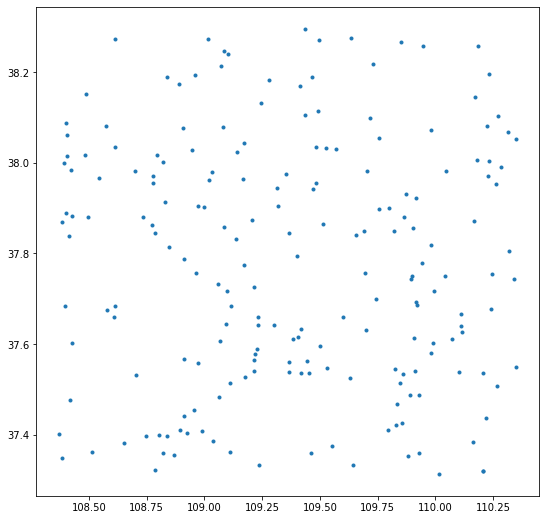

In [5]:
plt.plot(a,b,'.')

In [6]:
file.writeto(outputfile, overwrite=True, output_verify="fix")
file.close()

# Restore flux distribution

In [7]:
#In case you need to re-initialize the flux distribution in fake_points, the it from this file
lehmer = 'CDFS_cat_lehmer.fits'

In [8]:
file = fits.open(inputfile)
chandra_cat = fits.open(lehmer)

for i in range(len(file[1].data)):
    file[1].data[i][8] = chandra_cat[1].data[i][6]
    
file.writeto(inputfile, overwrite=True, output_verify="fix")